In [1]:
from mpl_toolkits import mplot3d

In [2]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np
import pandas as pd

from matplotlib.animation import FuncAnimation
from matplotlib.path import Path
from matplotlib import rc

import json
from collections import defaultdict

In [3]:
purchased_itemGamma_dict = np.load('data/complete_itemGamma.npy').item()
played_itemGamma_dict = np.load('data/complete_played_itemGamma.npy').item()

with open('data/items_meta_data.json', 'r') as data:
    games_dict = json.load(data)

In [130]:
genres_list = set()
for game in games_dict.values():
    if 'genres' in game:
        for genre in game['genres']:
            genres_list.add(genre)
genres_list

{'Accounting',
 'Action',
 'Adventure',
 'Animation &amp; Modeling',
 'Audio Production',
 'Casual',
 'Design &amp; Illustration',
 'Early Access',
 'Education',
 'Free to Play',
 'Indie',
 'Massively Multiplayer',
 'Photo Editing',
 'RPG',
 'Racing',
 'Simulation',
 'Software Training',
 'Sports',
 'Strategy',
 'Utilities',
 'Video Production',
 'Web Publishing'}

In [5]:
df = pd.DataFrame(games_dict)

In [6]:
df = df.T #https://steamcdn-a.akamaihd.net/steam/apps/643980/header.jpg

In [7]:
df['title'] = df['title'].fillna(df['app_name'])

In [8]:
for row in df.loc[df.genres.isnull(), 'genres'].index:
    df.at[row, 'genres'] = []

In [9]:
new_df = df.filter(['title', 'genres','popularity', 'total_playtime'], axis=1)

In [10]:
new_df

,title,genres,popularity,total_playtime
761140,Lost Summoner Kitty,"[Action, Casual, Indie, Simulation, Strategy]",0,0
643980,Ironbound,"[Free to Play, Indie, RPG, Strategy]",0,0
670290,Real Pool 3D - Poolians,"[Casual, Free to Play, Indie, Simulation, Sports]",0,0
767400,弹炸人2222,"[Action, Adventure, Casual]",0,0
773570,Log Challenge,[],0,0
772540,Battle Royale Trainer,"[Action, Adventure, Simulation]",0,0
774276,SNOW - All Access Basic Pass,"[Free to Play, Indie, Simulation, Sports]",0,0
774277,SNOW - All Access Pro Pass,"[Free to Play, Indie, Simulation, Sports]",0,0
774278,SNOW - All Access Legend Pass,"[Free to Play, Indie, Simulation, Sports]",0,0
768800,Race,"[Casual, Indie, Racing, Simulation]",0,0


In [12]:
purchased_itemGamma = np.vstack([x for x in purchased_itemGamma_dict.values()])
played_itemGamma = np.vstack([x for x in played_itemGamma_dict.values()])

In [14]:
items = list(purchased_itemGamma_dict.keys())

In [15]:
pca = PCA(n_components=2)

In [16]:
pca.fit(purchased_itemGamma)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.explained_variance_ratio_

array([0.12032078, 0.10168586])

In [18]:
purchased_itemGamma_pca = pca.transform(purchased_itemGamma)
purchased_itemGamma_pca.shape

(10978, 2)

In [19]:
def plotGenreItems(graph, data):
    for index, item in enumerate(items):
        color = 'pink'
        if 'genres' in games_dict[item]:
            genres = games_dict[item]['genres']
            if 'Massively Multiplayer' in genres:
                color = 'red'
            elif 'RPG' in genres:
                color = 'cyan'
            elif 'Sports' in genres:
                color = 'blue'
            elif 'Action' in genres or 'Adventure' in genres:
                color = 'orange'
            elif 'Simulation' in genres:
                color = 'black'
            elif 'Strategy' in genres:
                color = 'green'
            elif 'Racing' in genres:
                color = 'yellow'
            else:
                color = 'pink'

            graph(*data[index].T, c=color, s=2);

    plt.show()

In [20]:
def plotPopularityItems(graph, data):
    for index, item in enumerate(items):
        color = 'green'
        if games_dict[item]['popularity'] < 50:
            color = 'blue'

        graph(*data[index].T, c=color, s=2);

    plt.show()

In [21]:
def plotPlaytimeItems(graph, data):
    for index, item in enumerate(items):
        color = 'green'
        average = games_dict[item]['total_playtime'] / games_dict[item]['popularity']
        if average <= games_dict[item]['median_playtime']:
            color = 'blue'

        graph(*data[index].T, c=color, s=2);

    plt.show()

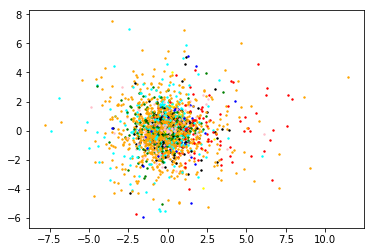

In [22]:
fig, ax = plt.subplots()
plotGenreItems(ax.scatter, purchased_itemGamma_pca)

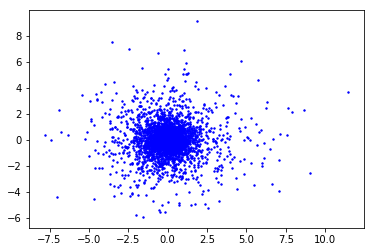

In [23]:
fig, ax = plt.subplots()
plotPopularityItems(ax.scatter, purchased_itemGamma_pca)

In [24]:
pca.fit(played_itemGamma)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca.explained_variance_ratio_

array([0.17845729, 0.14354698])

In [26]:
played_itemGamma_pca = pca.transform(played_itemGamma)
played_itemGamma_pca.shape

(10978, 2)

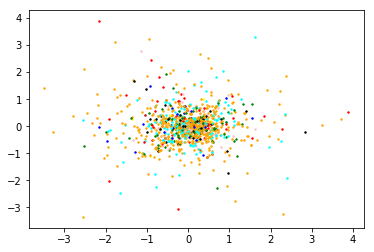

In [27]:
fig, ax = plt.subplots()
plotGenreItems(ax.scatter, played_itemGamma_pca)

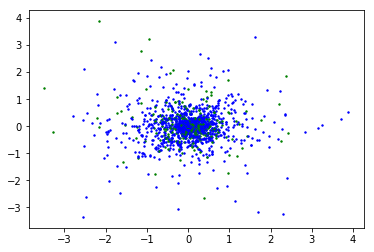

In [28]:
fig, ax = plt.subplots()
plotPlaytimeItems(ax.scatter, played_itemGamma_pca)

In [29]:
tsne = TSNE(n_components=2, n_iter=5000)

In [30]:
purchased_itemGamma_tsne = tsne.fit_transform(purchased_itemGamma)

In [31]:
tsne.kl_divergence_

2.8009438514709473

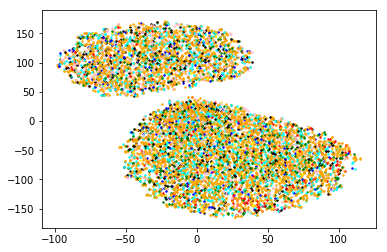

In [32]:
fig, ax = plt.subplots()
plotGenreItems(ax.scatter, purchased_itemGamma_tsne)

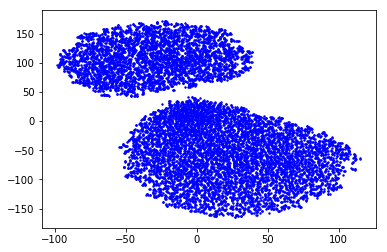

In [35]:
fig, ax = plt.subplots()
plotPopularityItems(ax.scatter, purchased_itemGamma_tsne)

In [36]:
played_itemGamma_tsne = tsne.fit_transform(played_itemGamma)

In [37]:
tsne.kl_divergence_

2.9850873947143555

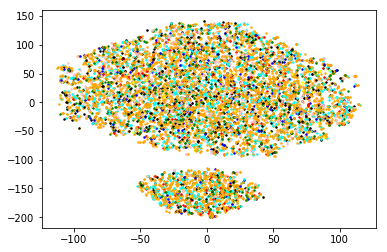

In [39]:
fig, ax = plt.subplots()
plotGenreItems(ax.scatter, played_itemGamma_tsne)

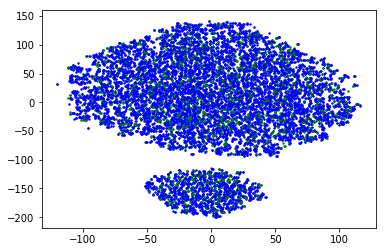

In [40]:
fig, ax = plt.subplots()
plotPlaytimeItems(ax.scatter, played_itemGamma_tsne)

In [97]:
# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, NumeralTickFormatter

In [126]:
def getGenreColor(genres):
    color = 'gray'
    if 'Massively Multiplayer' in genres:
        color = 'red'
    elif 'RPG' in genres:
        color = 'cyan'
    elif 'Sports' in genres:
        color = 'royalblue'
    elif 'Action' in genres or 'Adventure' in genres:
        color = 'orange'
    elif 'Simulation' in genres:
        color = 'gold'
    elif 'Strategy' in genres:
        color = 'green'
    elif 'Racing' in genres:
        color = 'yellow'
    else:
        color = 'pink'
    return color

In [135]:
colors_labels = dict.fromkeys(['red', 'cyan', 'royalblue', 'orange', 'gold', 'green', 'yellow', 'pink'])
colors_labels['red'] = 'Massively Multiplayer'
colors_labels['cyan'] = 'RPG'
colors_labels['royalblue'] = 'Sports'
colors_labels['orange'] = 'Action & Adventure'
colors_labels['gold'] = 'Simulation'
colors_labels['green'] = 'Strategy'
colors_labels['yellow'] = 'Racing'
colors_labels['pink'] = 'Others'

In [136]:
purchased_data = new_df.loc[list(purchased_itemGamma_dict.keys())]
purchased_data['c1'] = purchased_itemGamma_tsne[:, 0]
purchased_data['c2'] = purchased_itemGamma_tsne[:, 1]
pd.set_option('display.max_colwidth', 255)
purchased_data['imgs'] = ['https://steamcdn-a.akamaihd.net/steam/apps/{0}/header.jpg'.format(x) for x in items]
genres = purchased_data['genres']
colors = [getGenreColor(genre) for genre in genres]
purchased_data['color'] = colors
labels = [colors_labels[color] for color in colors]
purchased_data['label'] = labels

In [137]:
purchased_data

,title,genres,popularity,total_playtime,c1,c2,imgs,color,label
282010,Carmageddon Max Pack,"[Action, Indie, Racing]",1,409,-0.165835,-98.484161,https://steamcdn-a.akamaihd.net/steam/apps/282010/header.jpg,orange,Action & Adventure
70,Half-Life,[Action],1,1010,-13.833418,-138.461258,https://steamcdn-a.akamaihd.net/steam/apps/70/header.jpg,orange,Action & Adventure
1640,Disciples II: Gallean's Return,[Strategy],1,1,-27.337011,-55.456692,https://steamcdn-a.akamaihd.net/steam/apps/1640/header.jpg,green,Strategy
1630,Disciples II: Rise of the Elves,[Strategy],1,746,-14.372670,-68.373291,https://steamcdn-a.akamaihd.net/steam/apps/1630/header.jpg,green,Strategy
2400,The Ship: Murder Party,"[Action, Indie, RPG]",1,510,29.989182,-129.555115,https://steamcdn-a.akamaihd.net/steam/apps/2400/header.jpg,cyan,RPG
374970,Golf Masters,[],1,0,-53.852562,145.095703,https://steamcdn-a.akamaihd.net/steam/apps/374970/header.jpg,pink,Others
3800,Advent Rising,[Action],1,325,15.273128,-74.173409,https://steamcdn-a.akamaihd.net/steam/apps/3800/header.jpg,orange,Action & Adventure
1520,DEFCON,"[Indie, Strategy]",1,0,5.273715,-126.215446,https://steamcdn-a.akamaihd.net/steam/apps/1520/header.jpg,green,Strategy
2420,The Ship: Single Player,"[Action, Indie, RPG]",1,285,74.632622,-99.642113,https://steamcdn-a.akamaihd.net/steam/apps/2420/header.jpg,cyan,RPG
4000,Garry's Mod,"[Indie, Simulation]",1,0,19.209278,-143.820969,https://steamcdn-a.akamaihd.net/steam/apps/4000/header.jpg,gold,Simulation


In [123]:
# Output to notebook
output_notebook()

Loading BokehJS ...

In [149]:
# Store the data in a ColumnDataSource
purchased_items_cds = ColumnDataSource(purchased_data)

# Specify the selection tools to be made available
select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'crosshair', 'hover',
                'reset', 'zoom_in', 'zoom_out', 'save', 'redo', 'undo']

# Create the figure
fig = figure(plot_height=600,
             plot_width=800,
             x_axis_label='Component 1',
             y_axis_label='Component 2',
             title='t-SNE Latent Space Visualization (10978 items with purchase objective)',
             toolbar_location='below',
             tools=select_tools)


# Add square representing each player
fig.circle(x='c1',
           y='c2',
           radius=1,
           source=purchased_items_cds,
           color='color',
           legend='label',
           selection_color='crimson',
           nonselection_color='lightgray',
           nonselection_alpha=0.3)

new_legend = fig.legend[0]
fig.legend[0].plot = None
fig.add_layout(new_legend, 'right')

from bokeh.models import HoverTool
from bokeh.layouts import layout 

# Custome Hover Tooltips
TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="45" alt="@imgs" width="45"
                style="float: left; margin: 5px 5px 2px 2px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 10px; font-weight: bold;">@title</span>
        </div>
        <div>
            <span style="font-size: 8px;">Popularity</span>
            <span style="font-size: 8px; color: #966;">@popularity</span>
        </div>
        <div>
            <span style="font-size: 8px;">Genres</span>
            <span style="font-size: 8px; color: #966;">@genres</span>
        </div>
        <div>
            <span style="font-size: 8px;">Location</span>
            <span style="font-size: 8px; color: #696;">($x, $y)</span>
        </div>
    </div>
"""

# Add the HoverTool to the figure
fig.add_tools(HoverTool(tooltips=TOOLTIPS, anchor='bottom_right', point_policy='snap_to_data', attachment='right'))

# Visualize
show(fig, notebook_handle=True)